In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import holidays
import plotly.express as px 
import matplotlib.pyplot as plt
import os
from datetime import datetime, date, time


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tabular-playground-series-sep-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-sep-2022/train.csv
/kaggle/input/tabular-playground-series-sep-2022/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/tabular-playground-series-sep-2022/train.csv')
test = pd.read_csv('/kaggle/input/tabular-playground-series-sep-2022/test.csv')

In [3]:
ntrain = train.shape[0]
for cols in train.columns:
    print(cols, len(train[cols].unique()))

row_id 70128
date 1461
country 6
store 2
product 4
num_sold 699


In [4]:
for cols in test.columns:
    print(cols, len(test[cols].unique()))

row_id 17520
date 365
country 6
store 2
product 4


In [5]:
train_base = train.copy(deep = True)
test_base = test.copy(deep = True)

target = train['num_sold']
train.drop(['row_id','num_sold'], axis = 1, inplace = True)

In [6]:
df = pd.concat([train, test]).reset_index()

In [7]:
def extract_date_features(df):
    df['date'] = pd.to_datetime(df['date'])
    df['day'] = df['date'].apply(lambda x: x.weekday())
    df['is_weekend'] = np.where(df['day'].isin([5,6]), 1,0)
    df['month'] = df['date'].apply(lambda x: x.month)
    df['year'] = df['date'].apply(lambda x: x.year)
    
    return df
    

In [8]:
df = extract_date_features(df)

In [9]:
countryMapping = {'Belgium':'BE', 'France':"FR", 'Germany':'DE', 'Italy':'IT', 'Poland':'PL', 'Spain':'ES'}

In [10]:
def get_holidays(df):
    years_list = [2017, 2018, 2019, 2020, 2021]

    holiday_BE = holidays.CountryHoliday('BE', years = years_list)
    holiday_FR = holidays.CountryHoliday('FR', years = years_list)
    holiday_DE = holidays.CountryHoliday('DE', years = years_list)
    holiday_IT = holidays.CountryHoliday('IT', years = years_list)
    holiday_PL = holidays.CountryHoliday('PL', years = years_list)
    holiday_ES = holidays.CountryHoliday('ES', years = years_list)

    holiday_dict = holiday_BE.copy()
    holiday_dict.update(holiday_FR)
    holiday_dict.update(holiday_DE)
    holiday_dict.update(holiday_IT)
    holiday_dict.update(holiday_PL)
    holiday_dict.update(holiday_ES)

    df['holiday_name'] = df['date'].map(holiday_dict)
    df['is_holiday'] = np.where(df['holiday_name'].notnull(), 1, 0)
    df['holiday_name'] = df['holiday_name'].fillna('Not Holiday')
    
    return df

In [11]:
df = get_holidays(df)

In [12]:
import seaborn as sns

In [13]:
train['num_sold'] = target

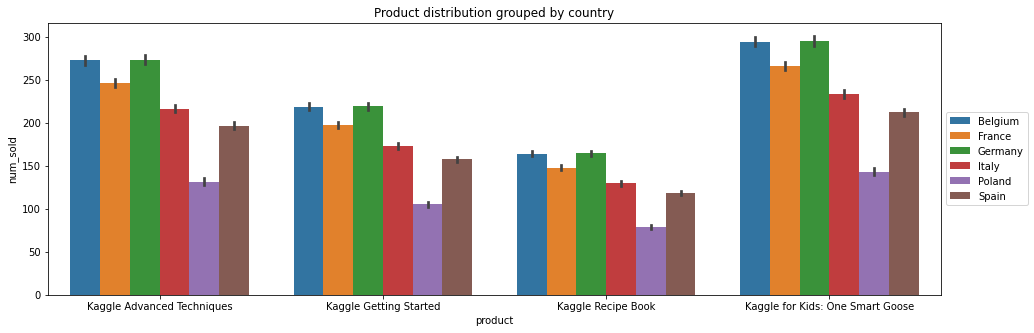

In [14]:
plt.figure(figsize=(16,5))
ax = sns.barplot(data=train, x='product', y='num_sold', hue='country')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Product distribution grouped by country')
plt.show()

In [15]:
df['num_sold'] = target

In [16]:
byday = df.groupby(['day']).sum().reset_index()

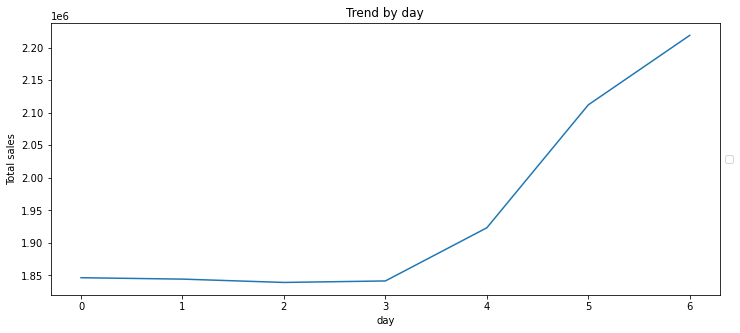

In [17]:
plt.figure(figsize=(12,5))
ax = sns.lineplot(data=byday, x='day', y='num_sold')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Trend by day')
plt.ylabel('Total sales')
plt.show()

In [18]:
bydayyear = df.groupby(['day','year']).sum().reset_index()

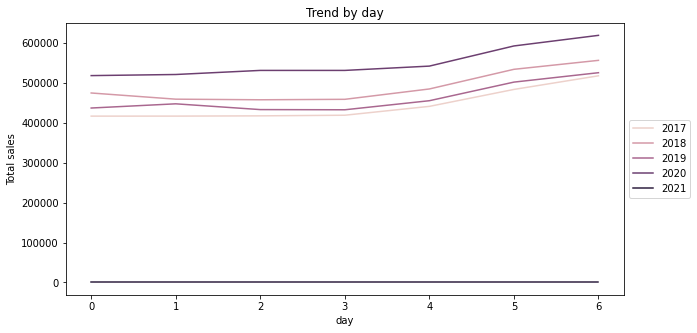

In [19]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=bydayyear, x='day', y='num_sold', hue = 'year')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Trend by day')
plt.ylabel('Total sales')
plt.show()

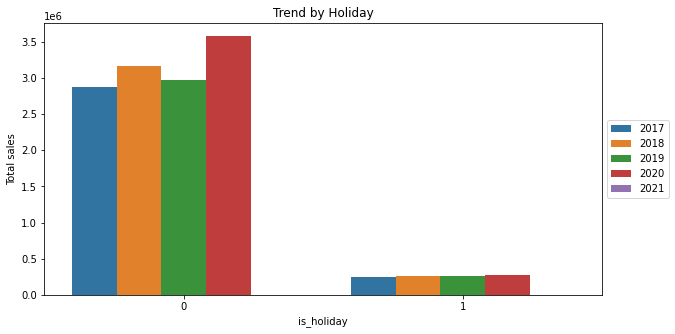

In [20]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=df.groupby(['is_holiday','year']).sum().reset_index(), x='is_holiday', y='num_sold', hue = 'year')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Trend by Holiday')
plt.ylabel('Total sales')
plt.show()

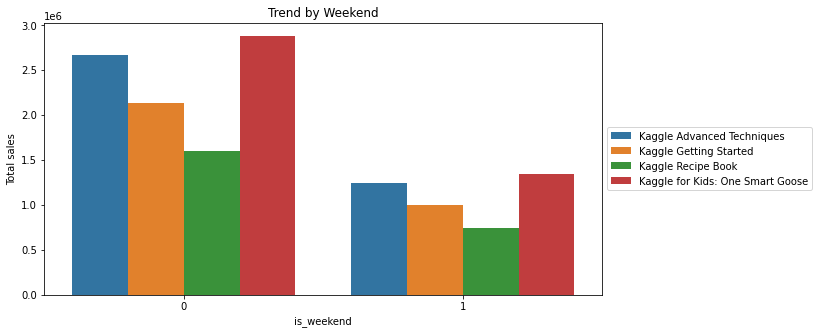

In [21]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=df.groupby(['is_weekend','product']).sum().reset_index(), x='is_weekend', y='num_sold', hue = 'product')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Trend by Weekend')
plt.ylabel('Total sales')
plt.show()

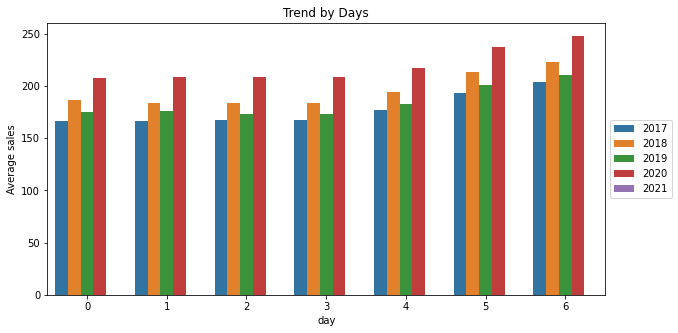

In [22]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=df.groupby(['day','year']).mean().reset_index(), x='day', y='num_sold', hue = 'year')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Trend by Days')
plt.ylabel('Average sales')
plt.show()

In [23]:
bymonth = df.groupby(['month','year']).sum().reset_index()

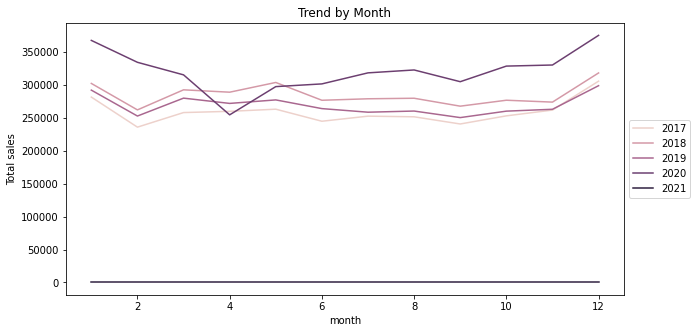

In [24]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=bymonth, x='month', y='num_sold', hue = 'year')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Trend by Month')
plt.ylabel('Total sales')
plt.show()

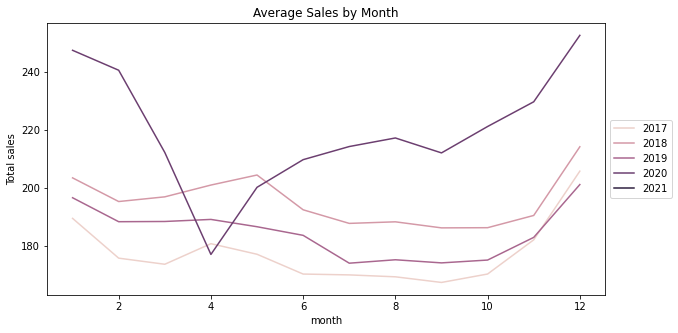

In [25]:
averageSales = df.groupby(['month','year']).mean().reset_index()
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=averageSales, x='month', y='num_sold', hue = 'year')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Average Sales by Month')
plt.ylabel('Total sales')
plt.show()

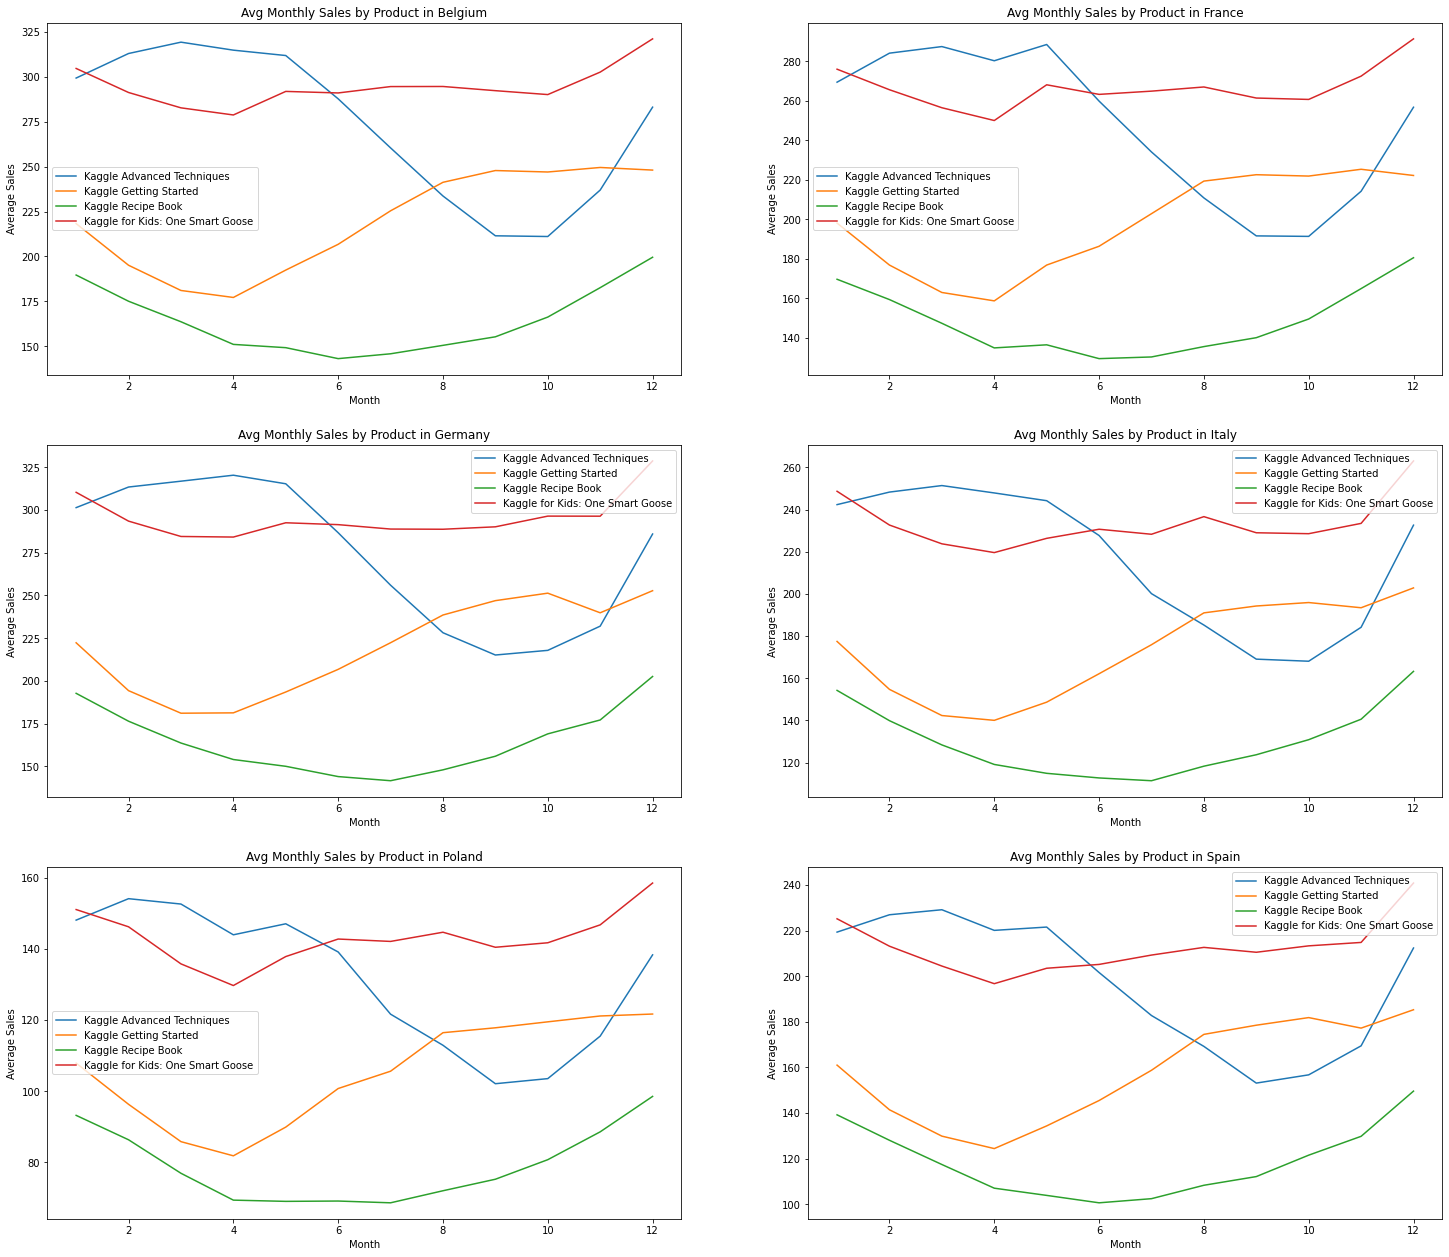

In [26]:
df_1 = pd.DataFrame(df.groupby(['product','country','month']).num_sold.mean()).reset_index()
fig = plt.figure(figsize  = (25,22)) 
country_list = list(df_1["country"].value_counts().index)
product_list = list(df_1["product"].value_counts().index)
for i in range(6):
    ax = fig.add_subplot(3,2,i+1)
    for p in product_list:
         ax.plot(df_1[(df_1['country']==country_list[i]) & (df_1['product']==p)]['month'], df_1[(df_1['country']==country_list[i]) & (df_1['product']==p)]['num_sold'], label = p)
    ax.title.set_text(f'Avg Monthly Sales by Product in {country_list[i]}')
    ax.set_ylabel('Average Sales')
    ax.set_xlabel('Month')
    ax.legend()

In [27]:
from sklearn.model_selection import TimeSeriesSplit

In [28]:
# df.drop(['row_id','date', 'holiday_name'], axis = 1, inplace = True)
categorical_col = ['year','day' ,'is_weekend','is_holiday']
for col in train.columns:
    if train[col].dtype in [object, bool] and len(train[col].unique()) <= 50:
        categorical_col.append(col)

In [30]:
df.drop(['index','row_id','date', 'holiday_name'], axis = 1, inplace = True)

In [31]:
for col in categorical_col:
    df[col] = df[col].astype("category").cat.codes
df[categorical_col].head()

,year,day,is_weekend,is_holiday,country,store,product
0,0,6,1,1,0,0,0
1,0,6,1,1,0,0,1
2,0,6,1,1,0,0,2
3,0,6,1,1,0,0,3
4,0,6,1,1,0,1,0


In [32]:
x_train = df[:ntrain]
y_train = target

x_test = df[ntrain:]

In [33]:
features = ['country', 'store', 'product', 'day', 'is_weekend', 'month', 'year','is_holiday']

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.ensemble import StackingRegressor

In [36]:
split_index = 65000
x_train_ = x_train[:split_index]
x_valid = x_train[split_index:]

In [37]:
xgb_reg=xgb.XGBRegressor()

prams={
    'learning_rate':[0.03,0.05,0.1],
    'n_estimators':[500,2000,4000],
    'max_depth':[5,7,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
tscv = TimeSeriesSplit(n_splits=3)
random_clf=RandomizedSearchCV(xgb_reg, param_distributions=prams,verbose=1,
                                n_jobs=3, cv = tscv, n_iter=10)
random_clf.fit(x_train_[features], np.log1p(x_train_.num_sold))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
             

In [38]:
random_clf.best_params_

{'subsample': 1,
 'n_estimators': 500,
 'max_depth': 7,
 'learning_rate': 0.05,
 'colsample_bytree': 0.5}

In [39]:
params = {"objective": "reg:squarederror", 
          "eta": 0.05,  
          "max_depth": 7,
          "subsample": 0.3,
          "colsample_bytree": 0.5,
          "seed": 10
          }
num_boost_round = 3000

dtrain = xgb.DMatrix(x_train_[features], np.log1p(x_train_.num_sold))
dvalid = xgb.DMatrix(x_valid[features], np.log1p(x_valid.num_sold))
watchlist = [(dtrain, 'train'),(dvalid,'valid')]
# train the xgboost model
model = xgb.train(params, dtrain, num_boost_round, evals=watchlist, \
  early_stopping_rounds= 50, verbose_eval=True)

[0]	train-rmse:4.36206	valid-rmse:4.59506
[1]	train-rmse:4.14849	valid-rmse:4.37352
[2]	train-rmse:3.94526	valid-rmse:4.17058
[3]	train-rmse:3.75303	valid-rmse:3.97614
[4]	train-rmse:3.56756	valid-rmse:3.78988
[5]	train-rmse:3.39459	valid-rmse:3.61049
[6]	train-rmse:3.22671	valid-rmse:3.44320
[7]	train-rmse:3.06645	valid-rmse:3.28346
[8]	train-rmse:2.91457	valid-rmse:3.13308
[9]	train-rmse:2.77080	valid-rmse:2.98377
[10]	train-rmse:2.63641	valid-rmse:2.84206
[11]	train-rmse:2.50570	valid-rmse:2.71193
[12]	train-rmse:2.38258	valid-rmse:2.58174
[13]	train-rmse:2.26545	valid-rmse:2.46400
[14]	train-rmse:2.15688	valid-rmse:2.34842
[15]	train-rmse:2.05299	valid-rmse:2.24618
[16]	train-rmse:1.95279	valid-rmse:2.13970
[17]	train-rmse:1.85918	valid-rmse:2.04726
[18]	train-rmse:1.77044	valid-rmse:1.95913
[19]	train-rmse:1.68622	valid-rmse:1.87122
[20]	train-rmse:1.60396	valid-rmse:1.78441
[21]	train-rmse:1.52838	valid-rmse:1.70944
[22]	train-rmse:1.45640	valid-rmse:1.63279
[23]	train-rmse:1.388

In [40]:
x_test.drop(['num_sold'], axis = 1, inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
dtest = xgb.DMatrix(x_test)
y_test = model.predict(dtest)

In [42]:
sub = pd.DataFrame()
test_df = pd.read_csv('/kaggle/input/tabular-playground-series-sep-2022/test.csv')
test_IDs = test_df['row_id'].copy()
sub['row_id'] = test_IDs
sub['num_sold'] = np.expm1(y_test)
sub.to_csv('submission_xgb_1.csv',index=False)
sub.head()

,row_id,num_sold
0,70128,446.569458
1,70129,346.752808
2,70130,292.885254
3,70131,489.359802
4,70132,151.725067


In [43]:
df_new = pd.concat([train_base, test_base]).reset_index()

In [44]:
df_new['num_sold'].iloc[ntrain:] = np.expm1(y_test)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


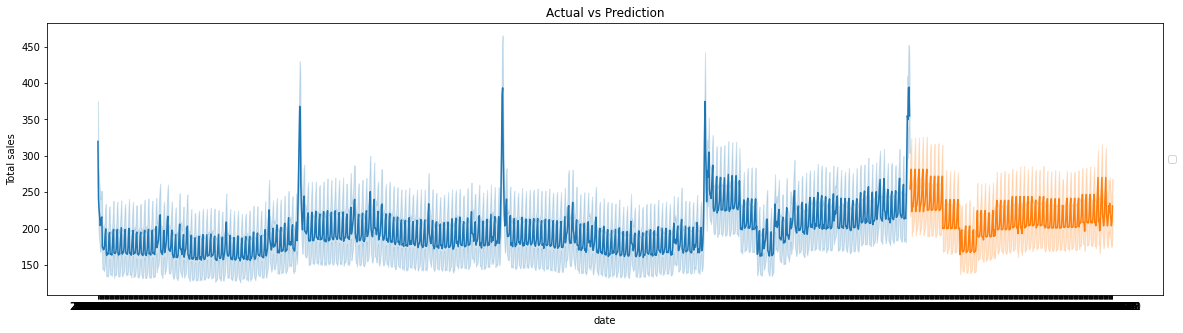

In [45]:
plt.figure(figsize=(20,5))
ax = sns.lineplot(data=df_new[:ntrain], x='date', y='num_sold',markers = ['o'])
ax = sns.lineplot(data=df_new[ntrain:], x='date', y='num_sold',markers = ['*'])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Actual vs Prediction')
plt.ylabel('Total sales')
plt.show()

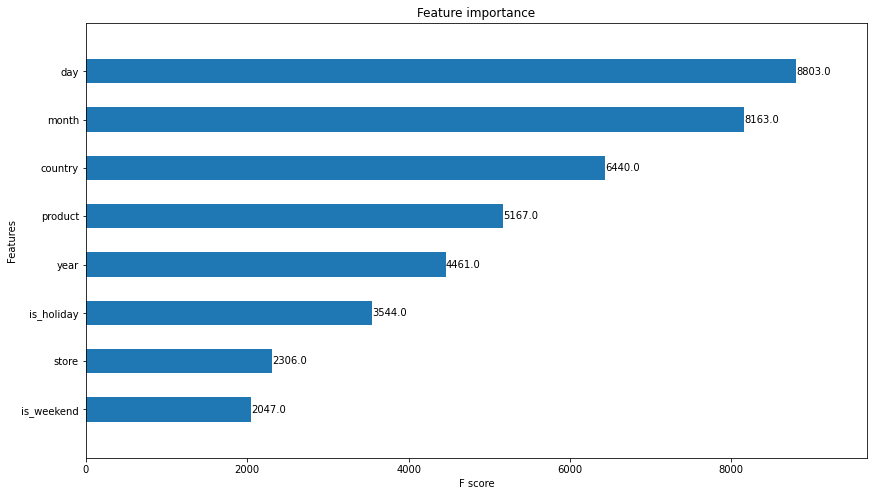

In [46]:
fig, ax = plt.subplots(figsize=(14,8))
xgb.plot_importance(model, max_num_features= 15, height=0.5, ax=ax, grid= False)
plt.show()